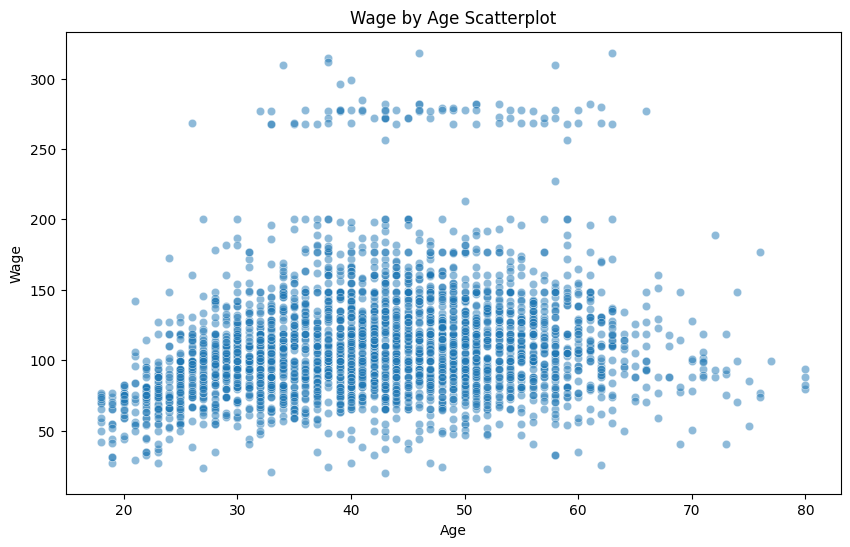

0       (17.938, 33.5]
1       (17.938, 33.5]
2         (33.5, 49.0]
3         (33.5, 49.0]
4         (49.0, 64.5]
             ...      
2995      (33.5, 49.0]
2996    (17.938, 33.5]
2997    (17.938, 33.5]
2998    (17.938, 33.5]
2999      (49.0, 64.5]
Name: age, Length: 3000, dtype: category
Categories (4, interval[float64, right]): [(17.938, 33.5] < (33.5, 49.0] < (49.0, 64.5] < (64.5, 80.0]]
                 Generalized Linear Model Regression Results                  
Dep. Variable:                   wage   No. Observations:                 3000
Model:                            GLM   Df Residuals:                     2996
Model Family:                Gaussian   Df Model:                            3
Link Function:               Identity   Scale:                          1634.1
Method:                          IRLS   Log-Likelihood:                -15353.
Date:                Mon, 11 Nov 2024   Deviance:                   4.8958e+06
Time:                        14:41:25   Pearson c

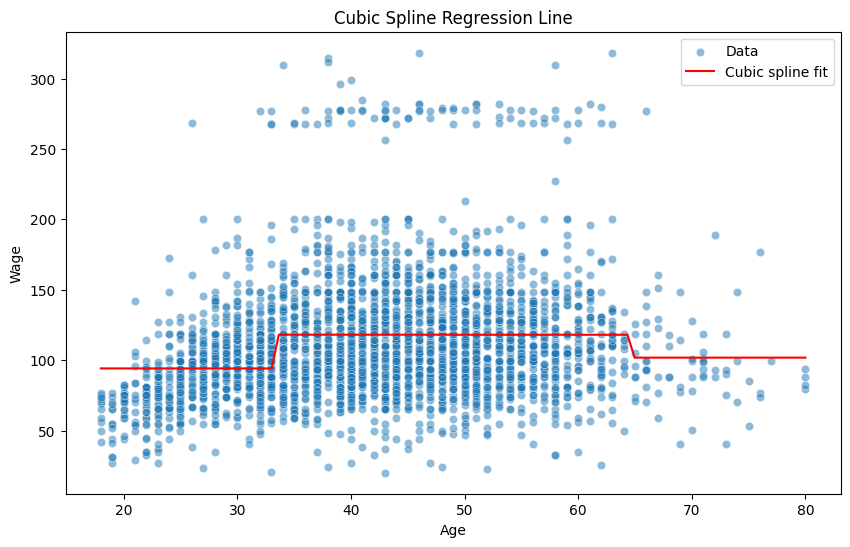

In [14]:
# Load packages and dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrix
import statsmodels.api as sm
from ISLP import load_data
df = load_data('Wage')

# Plot the data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['age'], y=df['wage'], alpha=0.5, label='Data')
plt.title("Wage by Age Scatterplot")
plt.xlabel("Age")
plt.ylabel("Wage")
plt.legend().remove()
plt.show()

# Transform data using cubic splines with knots at specified points
transformed_x = dmatrix("bs(age, knots=(33.5, 49, 64.5), degree=1, include_intercept=False)",
                        {"age": df['age']}, return_type='dataframe')

# Fit a Generalized Linear Model (GLM)
cs_model = sm.GLM(df['wage'], transformed_x).fit()

# Display summary of the model
print(cs_model.summary())

# Plot the cubic spline regression line
plt.figure(figsize=(10, 6))
xp = np.linspace(df['age'].min(), df['age'].max(), 100)
transformed_xp = dmatrix("bs(xp, knots=(33.5, 49, 64.5), degree=1, include_intercept=False)",
                         {"xp": xp}, return_type='dataframe')

print(xp.shape, transformed_xp.shape)

pred = cs_model.predict(transformed_xp)

sns.scatterplot(x=df['age'], y=df['wage'], alpha=0.5, label='Data')
plt.plot(xp, pred, label='Cubic spline fit', color='red')
plt.title("Cubic Spline Regression Line")
plt.xlabel("Age")
plt.ylabel("Wage")
plt.legend()
plt.show()